In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [62]:
df = pd.read_csv('/Users/ljs2000/데이터사이언스/csv/titanic.csv', index_col = 0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


명제 1: 타이나틱의 승객은 30대와 40대가 가장 많다 -> F

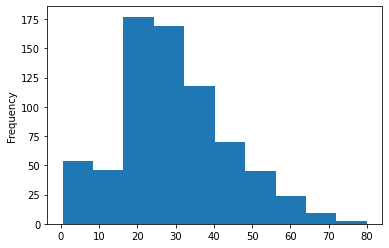

In [5]:
df['Age'].plot(kind='hist')

명제 2: 가장 높은 요금을 낸 사람은 30대이다 -> T

In [8]:
df['Fare'].sort_values(ascending=False)

PassengerId
680    512.3292
259    512.3292
738    512.3292
342    263.0000
439    263.0000
         ...   
278      0.0000
634      0.0000
303      0.0000
598      0.0000
272      0.0000
Name: Fare, Length: 891, dtype: float64

In [9]:
df[df['Fare'] == 512.3292]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


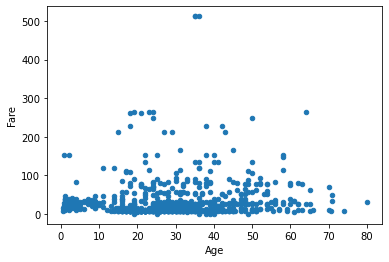

In [56]:
df.plot(kind='scatter', x = 'Age', y = 'Fare')

명제 3: 생존자가 사망자보다 많다 -> F

In [14]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

명제 4: 1등실, 2등실, 3등실 중 가장 많은 사람이 탑승한 곳은 3등실이다 -> T

In [38]:
total = df['Pclass'].value_counts()
total

2    184
1    216
3    491
Name: Pclass, dtype: int64

In [ ]:
명제 5: 가장 생존율이 높은 객실 등급은 1등실이다 -> T

In [39]:
survivors = df[df['Survived'] == 1]['Pclass'].value_counts()
survivors

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [40]:
survivors/total

1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64

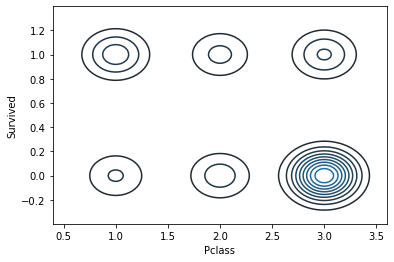

In [57]:
sns.kdeplot(df['Pclass'], df['Survived'])

1등급 객실 중 생존자(1)들이 밀집되어 있음.

명제 6: 나이가 어릴수록 생존율이 높다 -> F

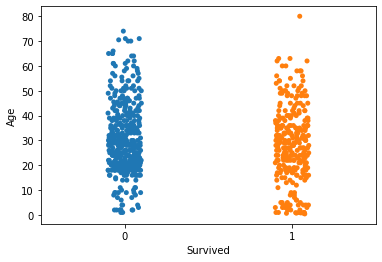

In [58]:
sns.stripplot(data=df, x = 'Survived', y = 'Age')

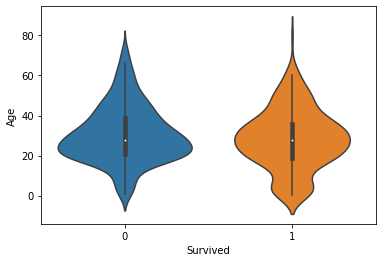

In [59]:
sns.violinplot(data=df, x = 'Survived', y = 'Age')

어디가 너 연령대가 낮은지 확실하지 않음

명제 7: 나이보다 성별이 생존율에 더 많은 영향을 미친다 -> T

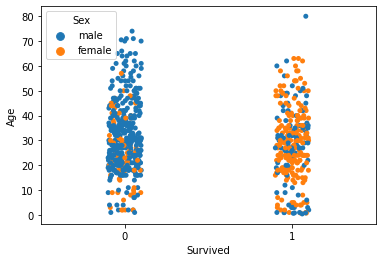

In [63]:
sns.stripplot(data=df, x = 'Survived', y = 'Age', hue='Sex')